# 01 Data Exploration
I am using the [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download) dataset from kaggle.

This dataset contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Using this dataset, the goal is to predict customer churn behavior.

- customerID: Unique customer identification code
- gender: male or a female
- SeniorCitizen: Indicates if customer is 65 or older (1 = Y, 0 = N)
- Partner: Has a partner or not (Yes or No)
- Dependents: Lives with any dependents or not (Yes or No)
- tenure: Number of months the customer has stayed with the company
- PhoneService: Has a phone service or not (Yes or No)
- MultipleLines: Has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer's internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Has online security or not (Yes, No, No internet service)
- OnlineBackup: Has online backup or not (Yes, No, No internet service)
- DeviceProtection: Has device protection or not (Yes, No, No internet service)
- TechSupport: Has tech support or not (Yes, No, No internet service)
- StreamingTV: Has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Has streaming movies or not (Yes, No, No internet service)
- Contract: Contract term of the customer (Month-to-month, One year, Two years)
- PaperlessBilling: Has paperless billing or not (Yes, No)
- PaymentMethod: Payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card)
- MonthlyCharges: Amount charged to the customer monthly
- TotalCharges: Total amount charged to the customer
- Churn: Churned or not (Yes or No)

In [81]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set plot style
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
# Load the dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# See number of features and observations
df.shape

(7043, 21)

In [9]:
# See if there are any null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Checking for duplication
df.duplicated().sum()

0

In [13]:
# Checking data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# See distribution of target variable
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
# Viewing unique values contained in each feature
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Data Cleaning
Data Cleaning tasks that I need to do:
- Label target variable
- Drop customerID column
- Fix datatype for TotalCharges field to numeric
- Mark missing values in TotalCharges as NaN and then drop the observations

TotalCharges are Nan because they were new customers who hadn't been charged yet. None of them have churned either.

In [20]:
# Label target variable
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [22]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [24]:
# Converting TotalCharges column to numeric and marking errors like ' ' as NaNs
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Updated datatype: {df['TotalCharges'].dtypes}")
print(f"Total Null values created: {df['TotalCharges'].isna().sum()}")

Updated datatype: float64
Total Null values created: 11


In [26]:
# Drop rows where TotalCharges is NaN
df = df.dropna(subset=['TotalCharges'])
df.shape

(7032, 20)

## Explore & Plot Continuous Features

In [29]:
# Keep continuous features
df_cont = df[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']]
df_cont.head()

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65


In [31]:
# Look at distribution of these features
df_cont.describe()

,Churn,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,32.421786,64.798208,2283.300441
std,0.441782,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,1.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [33]:
# Look at correlation matrix
df_cont.corr()

,Churn,tenure,MonthlyCharges,TotalCharges
Churn,1.000000,-0.354049,0.192858,-0.199484
tenure,-0.354049,1.000000,0.246862,0.825880
MonthlyCharges,0.192858,0.246862,1.000000,0.651065
TotalCharges,-0.199484,0.825880,0.651065,1.000000


In [35]:
from scipy import stats

def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(df_cont.groupby('Churn')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    churned = df_cont[df_cont['Churn']==1][feature]
    not_churned = df_cont[df_cont['Churn']==0][feature]
    tstat, pval = stats.ttest_ind(churned, not_churned, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [37]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    describe_cont_feature(feature)


*** Results for tenure ***
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0
t-statistic: -35.0, p-value: 2.35e-234
None

*** Results for MonthlyCharges ***
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35
t-statistic: 18.3, p-value: 2.66e-72
None

*** Results for TotalCharges ***
        count         mean          std    min      25%      50%       75%  \
Churn                                                                        
0      5163.0  2555.344141  2329.456984  18.80  577.825  1683.60  4264.125   
1      1869.0  1531.796094  18

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

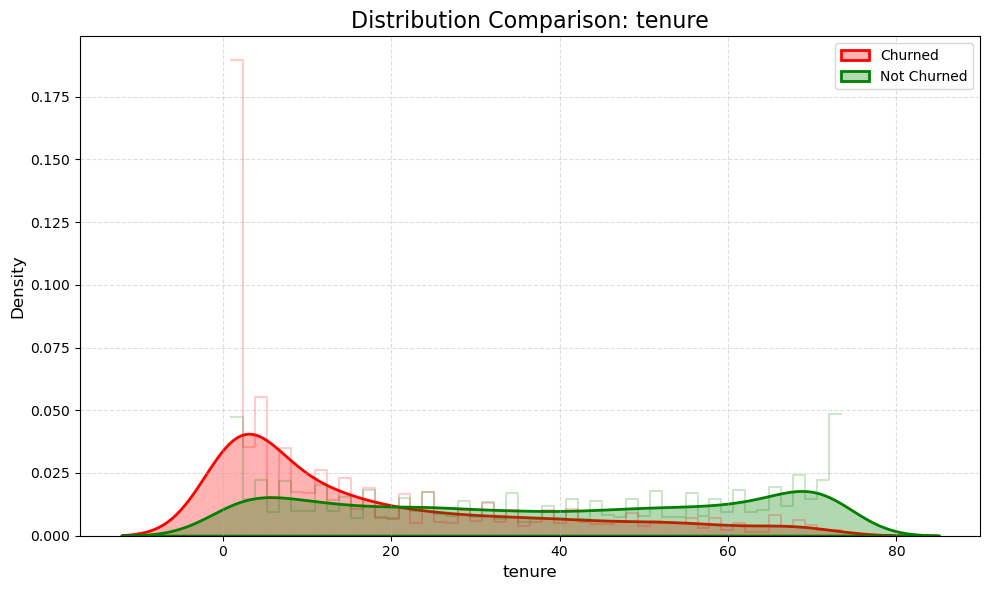

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

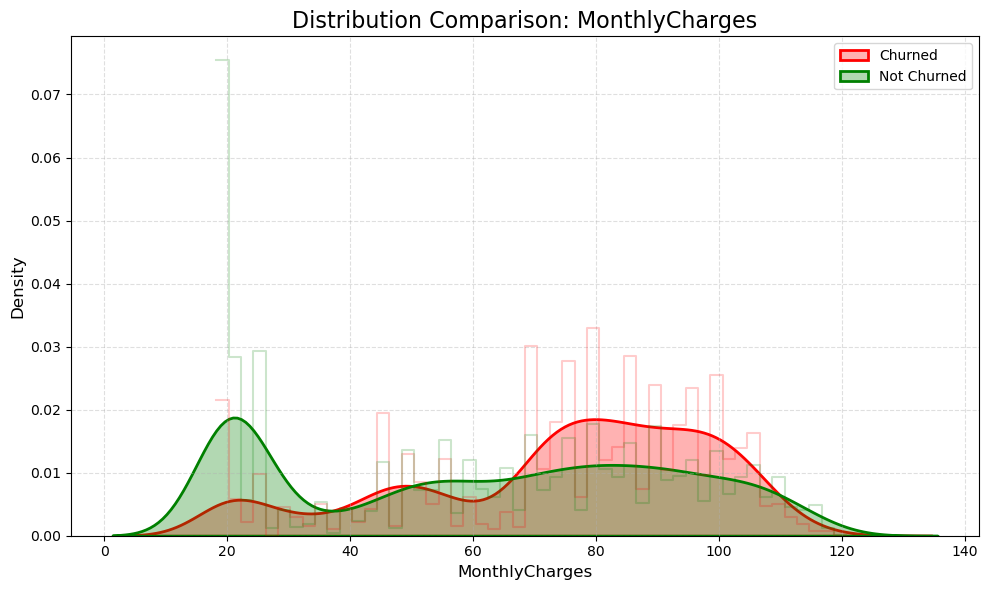

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

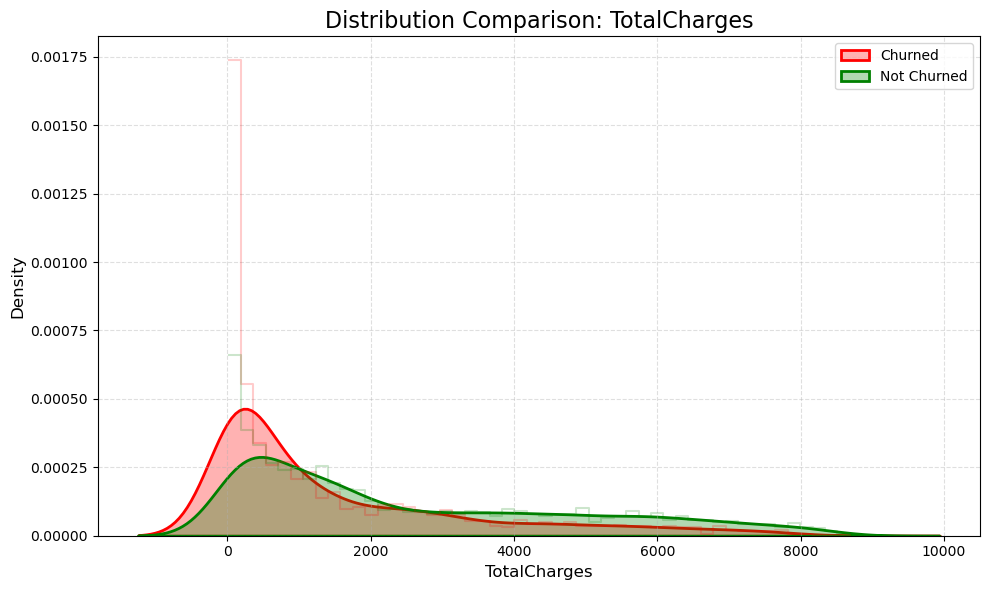

In [83]:
# Plot overlaid histogram for continuous features to view distribution between churned and not churned customers
features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in features:
    churned = df_cont[df_cont['Churn'] == 1][col].dropna()
    not_churned = df_cont[df_cont['Churn'] == 0][col].dropna()

    # Define consistent bins
    xmin = min(churned.min(), not_churned.min())
    xmax = max(churned.max(), not_churned.max())
    bin_width = (xmax - xmin) / 50
    bins = np.arange(xmin, xmax + bin_width, bin_width)

    plt.figure(figsize=(10, 6))

    sns.kdeplot(churned, color='red', label='Churned', fill=True, alpha=0.3, linewidth=2)
    sns.kdeplot(not_churned, color='green', label='Not Churned', fill=True, alpha=0.3, linewidth=2)

    sns.histplot(churned, bins=bins, stat='density', color='red', alpha=0.2, element='step', fill=False)
    sns.histplot(not_churned, bins=bins, stat='density', color='green', alpha=0.2, element='step', fill=False)

    plt.title(f'Distribution Comparison: {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

/var/folders/l8/kqnd0fwx1lzfrwfff084nsfc0000gn/T/ipykernel_20951/3885223630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont[f'{col}_bin'] = pd.cut(df_cont[col], bins=bin_settings[col])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

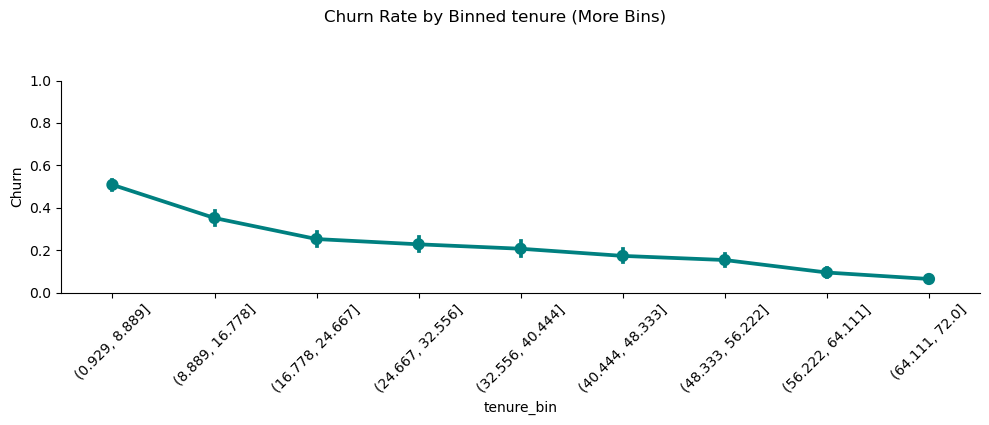

/var/folders/l8/kqnd0fwx1lzfrwfff084nsfc0000gn/T/ipykernel_20951/3885223630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont[f'{col}_bin'] = pd.cut(df_cont[col], bins=bin_settings[col])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

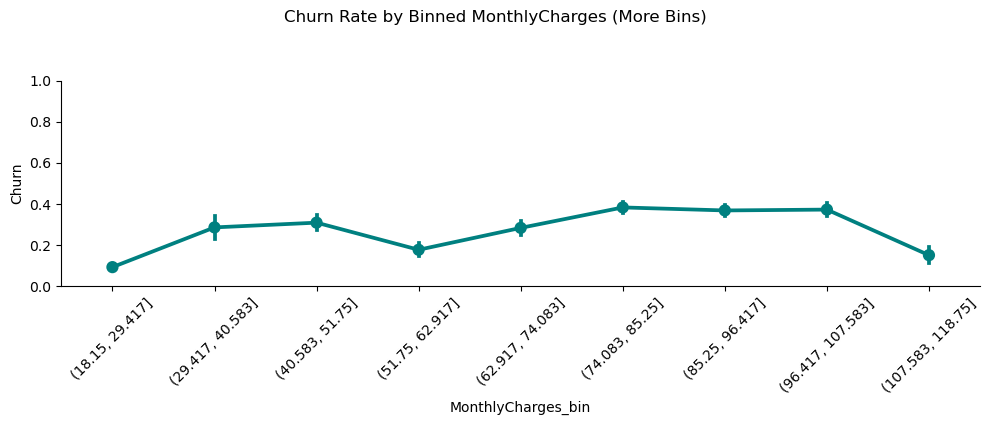

/var/folders/l8/kqnd0fwx1lzfrwfff084nsfc0000gn/T/ipykernel_20951/3885223630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cont[f'{col}_bin'] = pd.cut(df_cont[col], bins=bin_settings[col])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False t

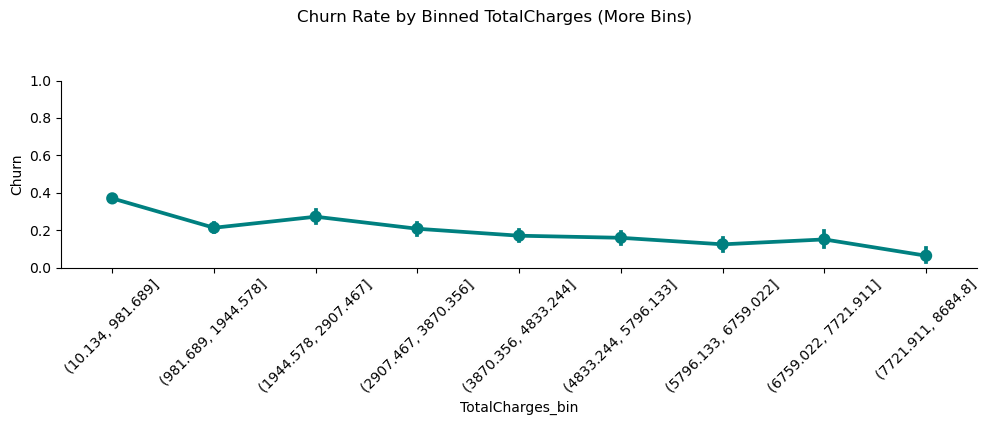

In [118]:
# Automatically define more bins (e.g., 8 to 10 bins)
bin_settings = {
    'tenure': 9,
    'MonthlyCharges': 9,
    'TotalCharges': 9
}

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    # Create more bins dynamically
    df_cont[f'{col}_bin'] = pd.cut(df_cont[col], bins=bin_settings[col])

    # Plot using seaborn's point plot (better for trend visualization)
    g = sns.catplot(
        x=f'{col}_bin', y='Churn', data=df_cont,
        kind='point', aspect=2.5, height=4, color='teal'
    )
    g.set_xticklabels(rotation=45)
    g.set(ylim=(0, 1))
    g.fig.suptitle(f'Churn Rate by Binned {col} (More Bins)', y=1.05)
    plt.tight_layout()
    plt.show()


## Explore & Plot Categorical Features